<a href="https://colab.research.google.com/github/geithelmasri/AAI614_Geith1/blob/main/DL_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN

Load Data


In [6]:

# Download latest version
path = kagglehub.dataset_download("muthuj7/weather-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.23M/2.23M [00:00<00:00, 108MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muthuj7/weather-dataset/versions/1


In [10]:
df = pd.read_csv(path + '/weatherHistory.csv')
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [24]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,0.575172,0.734899,0.169306,187.509232,0.642691,0.0,0.958768
std,9.551546,0.159509,0.195473,0.108274,107.383428,0.260380,0.0,0.111785
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,0.447767,0.600000,0.091276,116.000000,0.518000,0.0,0.967048
50%,12.000000,0.592246,0.780000,0.156077,180.000000,0.624000,0.0,0.971397
75%,18.838889,0.694226,0.890000,0.221382,290.000000,0.920000,0.0,0.975831
max,39.905556,1.000000,1.000000,1.000000,359.000000,1.000000,0.0,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.1+ MB


Visualize data and count


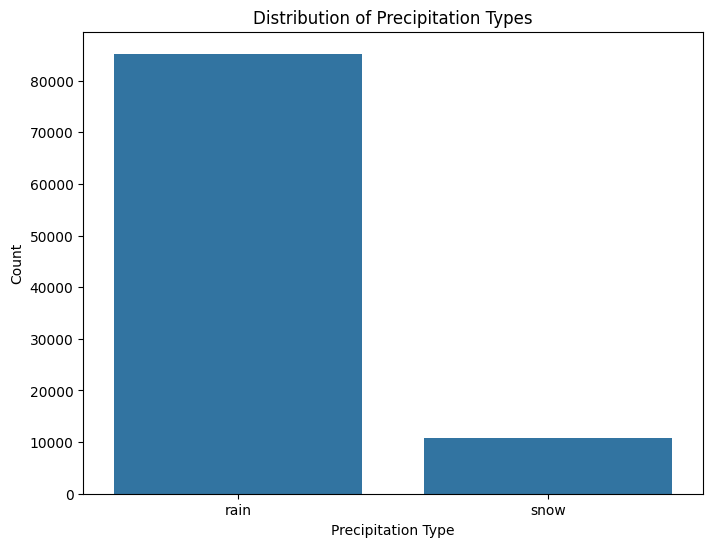

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Precip Type', data=df)
plt.title('Distribution of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.show()


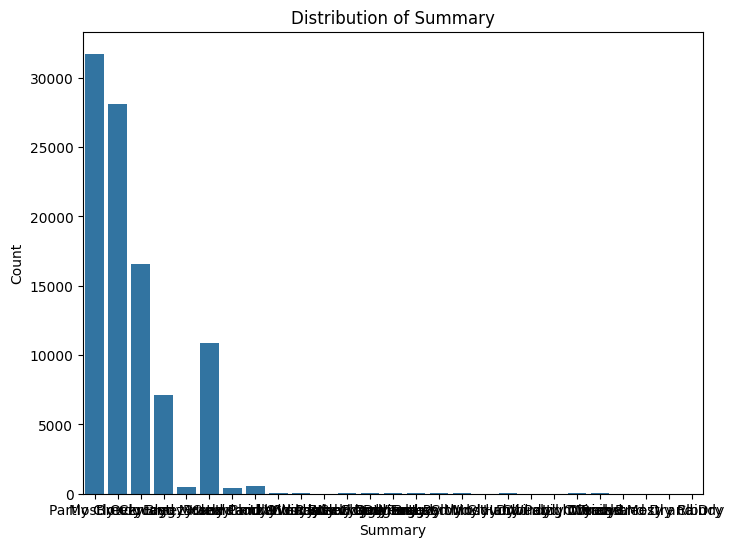

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Summary', data=df)
plt.title('Distribution of Summary')
plt.xlabel('Summary')
plt.ylabel('Count')
plt.show()

In [29]:
df["Summary"].value_counts()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


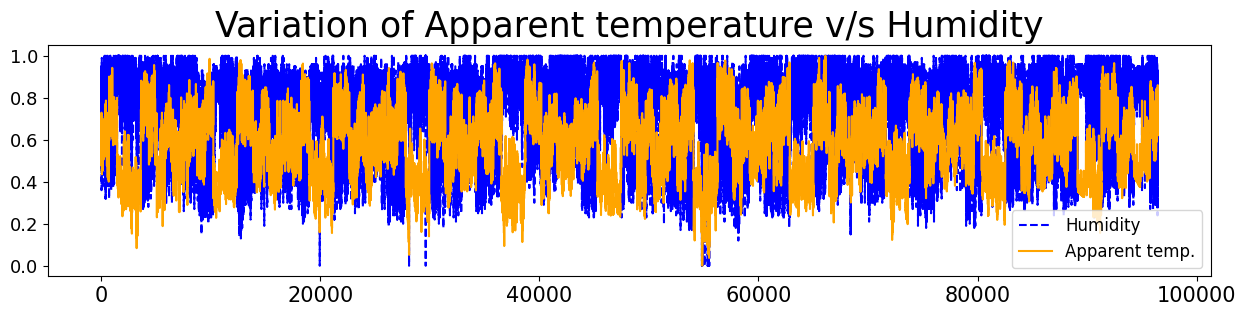

In [26]:
plt.figure(figsize=(15,3));
plt.plot(df['Humidity'], label = 'Humidity', color ='blue',linestyle='dashed');
plt.plot(df['Apparent Temperature (C)'], label = 'Apparent temp.', color  = 'orange');
plt.title('Variation of Apparent temperature v/s Humidity', fontsize = 25);
plt.legend(loc=0, fontsize =12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize=13);

Data Preprocessing

In [14]:
data = df
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.drop(columns=['Formatted Date'], inplace=True)

<ipython-input-14-13e69d2c128d>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])


In [15]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


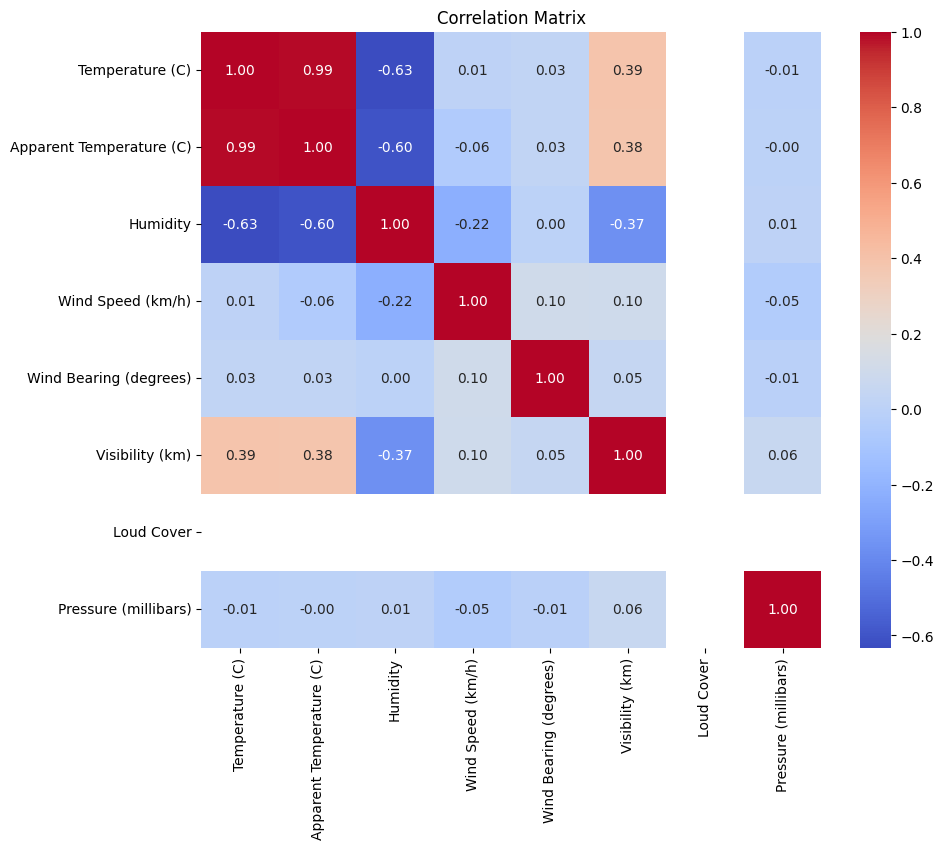

In [16]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix for reference
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
print(correlation_matrix.describe())

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
count         7.000000                  7.000000  7.000000           7.000000   
mean          0.255246                  0.249134 -0.117537           0.126095   
std           0.589398                  0.586471  0.555736           0.401238   
min          -0.632255                 -0.602571 -0.632255          -0.224951   
25%           0.001755                 -0.028434 -0.485872          -0.052956   
50%           0.029988                  0.029031 -0.224951           0.008957   
75%           0.692738                  0.687174  0.003094           0.102285   
max           1.000000                  1.000000  1.000000           1.000000   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count                7.000000         7.000000         0.0   
mean                 0.171360         0.230508         NaN   
std                  0.367281         0.424339         NaN   
min                 -0

In [19]:
# select features and target
target = 'Temperature (C)'
features = [
    'Apparent Temperature (C)',
    'Humidity',
    'Visibility (km)',
    'Wind Speed (km/h)',
    'Pressure (millibars)'
]

# Apply standard normalization
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Split dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Create the MLP model with Regularization, Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(len(features),), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

Epoch 1/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 58.5942 - mae: 5.3631 - val_loss: 2.4263 - val_mae: 0.7138
Epoch 2/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 17.8490 - mae: 2.9208 - val_loss: 4.5134 - val_mae: 1.5219
Epoch 3/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 15.5246 - mae: 2.7159 - val_loss: 3.8389 - val_mae: 1.1531
Epoch 4/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13.6238 - mae: 2.5478 - val_loss: 2.9062 - val_mae: 1.0217
Epoch 5/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 12.3842 - mae: 2.4211 - val_loss: 2.5165 - val_mae: 0.9345
Epoch 6/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 11.4562 - mae: 2.3357 - val_loss: 3.2211 - val_mae: 1.1084
Epoch 7/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 11.2020 - mae: 2.3047 - val_loss: 2.1894 - val_mae: 0.8316
Epoch 8/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 10.6661 - mae: 2.2450 - val_loss: 2.8151 - val_mae: 1.1136
Epoch 9/25
1930/1930 ━━━━━━━━

In [22]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Visualize predictions
y_pred = model.predict(X_test)

# Visualize predictions with different colors for predicted and actual temperatures
plt.figure(figsize=(8, 6))

Test Loss: 1.7154, Test MAE: 0.5577
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

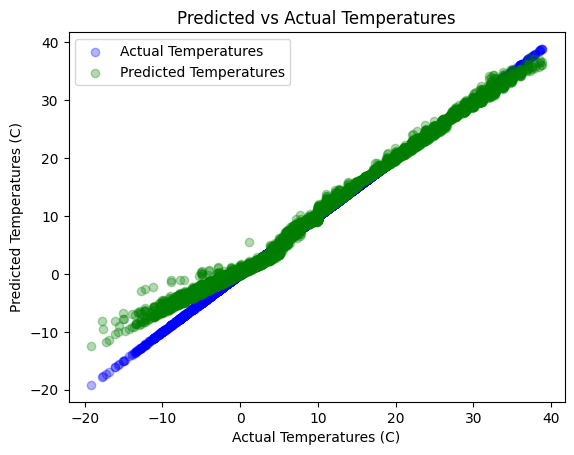

In [23]:
# Plot Actual Temperatures with reduced transparency
plt.scatter(y_test, y_test, alpha=0.3, color='blue', label="Actual Temperatures")

# Plot Predicted Temperatures with reduced transparency
plt.scatter(y_test, y_pred, alpha=0.3, color='green', label="Predicted Temperatures")

plt.xlabel("Actual Temperatures (C)")
plt.ylabel("Predicted Temperatures (C)")
plt.title("Predicted vs Actual Temperatures")
plt.legend()
plt.show()

simple RNN Model


In [43]:
# create model with simple RNN

from tensorflow.keras.layers import SimpleRNN

X_train_rnn = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])


# Create the SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(1, len(features))))
model_rnn.add(Dense(1))

# Compile the model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss_rnn, test_mae_rnn = model_rnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f"Test Loss (RNN): {test_loss_rnn:.4f}, Test MAE (RNN): {test_mae_rnn:.4f}")


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 96.6327 - mae: 7.5145 - val_loss: 5.0184 - val_mae: 1.7554
Epoch 2/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 3.1819 - mae: 1.3416 - val_loss: 1.0001 - val_mae: 0.7621
Epoch 3/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9175 - mae: 0.7355 - val_loss: 0.7300 - val_mae: 0.6552
Epoch 4/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.7170 - mae: 0.6569 - val_loss: 0.6790 - val_mae: 0.6310
Epoch 5/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6692 - mae: 0.6289 - val_loss: 0.4799 - val_mae: 0.5229
Epoch 6/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4242 - mae: 0.4903 - val_loss: 0.2906 - val_mae: 0.4019
Epoch 7/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.2708 - mae: 0.3731 - val_loss: 0.2496 - val_mae: 0.3515
Epoch 8/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.2265 - mae: 0.3302 - val_loss: 0.2066 - val_mae: 0.3020
Epoch 9/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 3

In [50]:
pd.DataFrame(history_rnn.history).tail()


,loss,mae,val_loss,val_mae
20,0.146217,0.235106,0.144502,0.234437
21,0.143985,0.234132,0.148737,0.248066
22,0.141448,0.230493,0.164511,0.279500
23,0.139892,0.229234,0.147139,0.240496
24,0.138166,0.227670,0.138725,0.230621


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


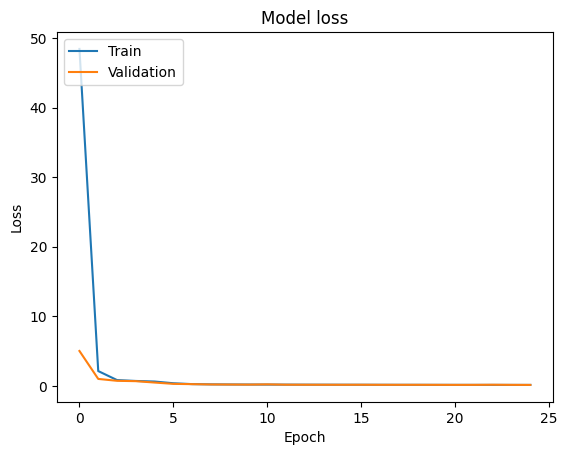

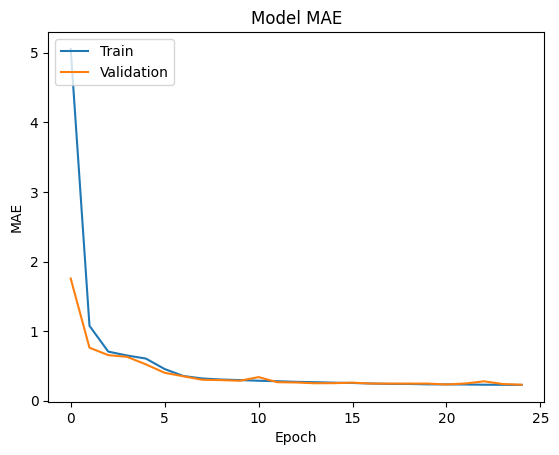

In [48]:
history_dict = history_rnn.history

print(history_dict.keys())

# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history_dict['mae'])
plt.plot(history_dict['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


LSTM


In [65]:

X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN (LSTM) model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, len(features))))
model_lstm.add(Dense(1))


# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=25,batch_size=32, validation_split=0.2, verbose=1)


# Evaluate the model
test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test_lstm, y_test, verbose=0)
print(f"Test Loss (LSTM): {test_loss_lstm:.4f}, Test MAE (LSTM): {test_mae_lstm:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 100.1465 - mae: 7.4822 - val_loss: 3.3992 - val_mae: 1.4278
Epoch 2/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.3135 - mae: 1.1480 - val_loss: 1.0065 - val_mae: 0.7636
Epoch 3/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9192 - mae: 0.7347 - val_loss: 0.7802 - val_mae: 0.7083
Epoch 4/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7240 - mae: 0.6579 - val_loss: 0.6296 - val_mae: 0.6066
Epoch 5/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6279 - mae: 0.6064 - val_loss: 0.5395 - val_mae: 0.5666
Epoch 6/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5339 - mae: 0.5620 - val_loss: 0.4499 - val_mae: 0.5108
Epoch 7/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.4341 - mae: 0.5058 - val_loss: 0.3693 - val_mae: 0.4653
Epoch 8/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3598 - mae: 0.4607 - val_loss: 0.3208 - val_mae: 0.4330
Epoch 9/25
1930/1930 ━━━━━━━━━━━━━━

In [66]:
pd.DataFrame(history_lstm.history).tail()

,loss,mae,val_loss,val_mae
20,0.228218,0.353892,0.222999,0.344592
21,0.226947,0.351981,0.226087,0.349916
22,0.226765,0.352197,0.222234,0.336306
23,0.225567,0.350924,0.219450,0.338981
24,0.224291,0.349039,0.232669,0.369558


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


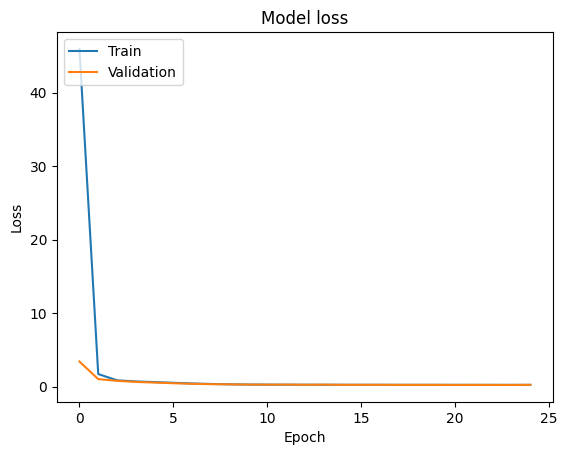

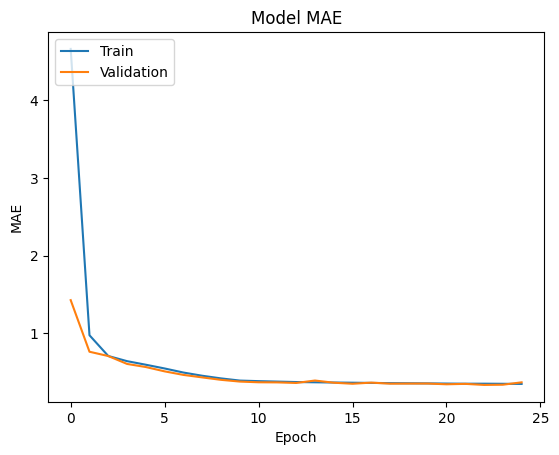

In [67]:
history_dict1 = history_lstm.history

print(history_dict1.keys())

# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history_dict1['loss'])
plt.plot(history_dict1['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history_dict1['mae'])
plt.plot(history_dict1['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


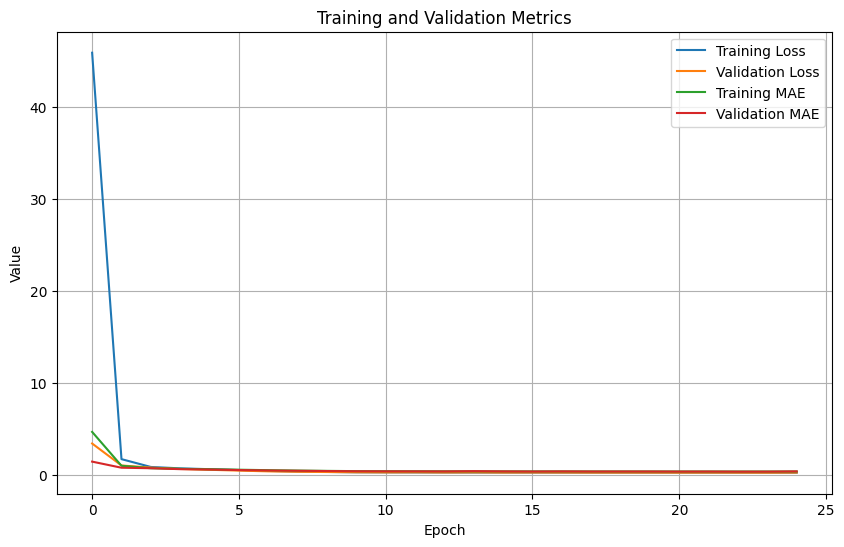

In [70]:

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(history_dict1['loss'], label='Training Loss')
plt.plot(history_dict1['val_loss'], label='Validation Loss')
plt.plot(history_dict1['mae'], label='Training MAE')
plt.plot(history_dict1['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid(True)
plt.show()


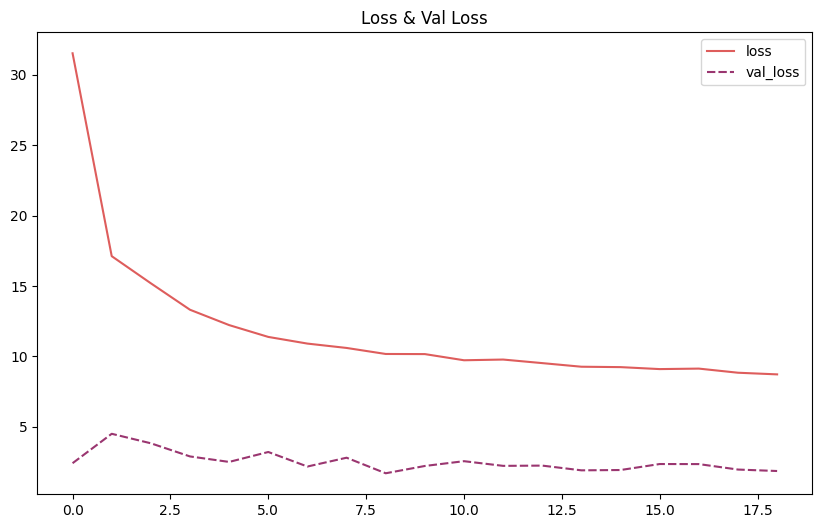

In [71]:
his.columns
history_loss = his[['loss', 'val_loss']]


plt.figure(figsize=(10, 6))
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [72]:
def predict_temperature(apparent_temperature, humidity, visibility, wind_speed, pressure):
    input_data = pd.DataFrame({
        'Apparent Temperature (C)': [apparent_temperature],
        'Humidity': [humidity],
        'Visibility (km)': [visibility],
        'Wind Speed (km/h)': [wind_speed],
        'Pressure (millibars)': [pressure]
    })

    # Scale the input data using the same scaler used for training
    input_data[features] = scaler.transform(input_data[features])

    # Reshape the input data for the LSTM model
    input_data_reshaped = input_data.values.reshape(input_data.shape[0], 1, input_data.shape[1])

    # Make the prediction
    prediction = model.predict(input_data_reshaped)

    # Return the predicted temperature
    return prediction[0][0]

# Example
predicted_temp = predict_temperature(10, 0.7, 10, 5, 1000)
print(f"Predicted Temperature: {predicted_temp}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Temperature: 10.127132415771484


GRU Model

In [73]:

from tensorflow.keras.layers import GRU

# Reshape the data for GRU input
X_train_gru = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(1, len(features))))
model_gru.add(Dense(1))

# Compile the model
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_gru = model_gru.fit(X_train_gru, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss_gru, test_mae_gru = model_gru.evaluate(X_test_gru, y_test, verbose=0)
print(f"Test Loss (GRU): {test_loss_gru:.4f}, Test MAE (GRU): {test_mae_gru:.4f}")




Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1930/1930 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 91.0847 - mae: 7.0885 - val_loss: 3.2608 - val_mae: 1.3763
Epoch 2/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 2.1477 - mae: 1.1098 - val_loss: 0.9414 - val_mae: 0.7537
Epoch 3/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.8802 - mae: 0.7303 - val_loss: 0.7211 - val_mae: 0.6496
Epoch 4/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6475 - mae: 0.6283 - val_loss: 0.4359 - val_mae: 0.4935
Epoch 5/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.3889 - mae: 0.4705 - val_loss: 0.2811 - val_mae: 0.3777
Epoch 6/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.2722 - mae: 0.3821 - val_loss: 0.2389 - val_mae: 0.3639
Epoch 7/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2350 - mae: 0.3500 - val_loss: 0.2308 - val_mae: 0.3592
Epoch 8/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2160 - mae: 0.3360 - val_loss: 0.2190 - val_mae: 0.3338
Epoch 9/25
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 7

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


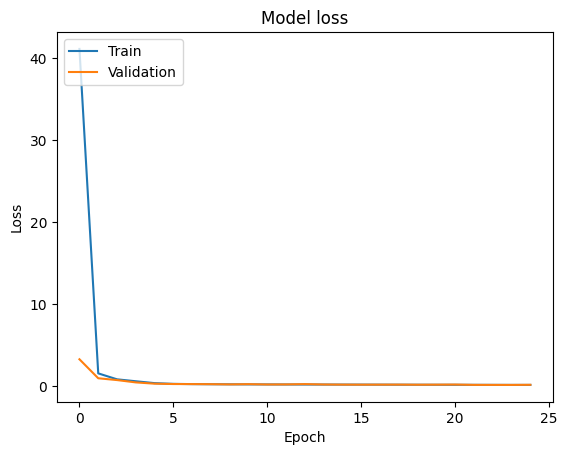

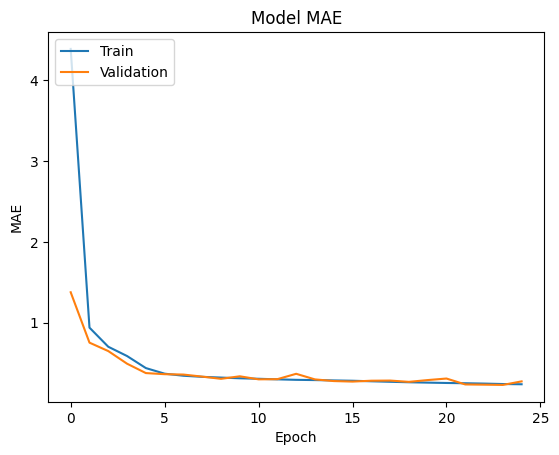

In [74]:
history_dict2 = history_gru.history

print(history_dict2.keys())

# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history_dict2['loss'])
plt.plot(history_dict2['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE values
plt.plot(history_dict2['mae'])
plt.plot(history_dict2['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
